# Project 2 

The framework should import only torch.empty, and use no pre-existing neural-network python toolbox. Your code should work with autograd globally off, which can be achieved with torch . set˙grad˙enabled ( False )

In [1]:
import math
import torch 
torch.set_grad_enabled(False)

### Build the data

Generates a training and a test set of 1, 000 points sampled uniformly in [0, 1]², each with a label 0 if outside the disk centered at (0.5, 0.5) of radius 1/sqrt(2π), and 1 inside.

In [2]:
def build_data(n):
       
    x = torch.empty(n, 2) #(n,2)
    x = x.uniform_(0, 1)
    
    x_centered = x - 0.5
    norm_squared = x_centered.pow(2).sum(dim=1)  #(n,)
    
    r_squared = 1/ (2*math.pi)
    
    y = norm_squared.sub(r_squared).sign().add(1).div(2)
    return x, y

In [3]:
X_train, y_train = build_data(1000)  #(1000,2) , #(1000)
X_test, y_test = build_data(1000)  #(1000,2) , #(1000)

In [4]:
x = X_train[:,0]
y = X_train[:,1]
colors = { 1.0 : 'g', 0 : 'y'}

In [5]:
c = [ colors[label] for label in y_train.numpy()]

### Visualize the data

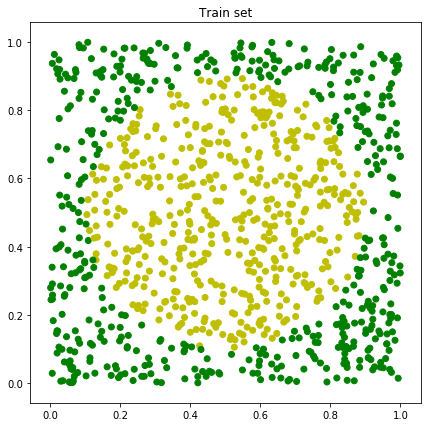

In [6]:
import matplotlib.pyplot as plt  # This is python's popular plotting library.

plt.figure(figsize=(7,7))
plt.scatter(x, y, c = c)
plt.title('Train set')
plt.show()

### Build the network

In [7]:
from linear import Linear
from activation_function.tanh import Tanh
from activation_function.sigmoid import Sigmoid
from sequential import Sequential

In [8]:
input_units = 10
hidden_units = 25
output_units = 1

network = Sequential(
            Linear(input_units, hidden_units),
            Tanh(),
            Linear(hidden_units, hidden_units),
            Tanh(),
            Linear(hidden_units, hidden_units),
            Tanh(),
            Linear(hidden_units, output_units),
            Tanh())